# Explorando dados com seaborn

## Gerar dados estatísticos

In [1]:
#importando as bibliotecas do pandas 
import pandas as pd
 

In [2]:
#importando e lendo os dados
dados = pd.read_csv('tips.csv')
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [3]:
#shape - verificar a quantidade de linhas(registros) e colunas
dados.shape

(244, 6)

TRADUÇÃO

In [4]:
#TRADUZINDO/alterando os nomes das colunas e os campos
#ver as variáveis(colunas)
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
# para renomear: utiliza chave:valor (dicionário)
renomear = {'total_bill':'valor_da_conta', 'tip':'gorjeta', 
            'dessert':'sobremesa', 'day':'dia_da_semana', 'time':'hora_do_dia', 'size':'total_pessoas'}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
#atribuindo um novo nome (gorjeta) com os novos dados
#renomeando as colunas
gorjetas = dados.rename(columns = renomear)
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [8]:
#verificar todos os tipos unicos de sobremesa
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
#alterando os nomes
sim_não = {'No':'Não', 'Yes':'Sim'}

In [10]:
#mapeando o sim não
gorjetas.sobremesa.map(sim_não)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [11]:
#incluindo o sim e o não nos dados
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_não)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [12]:
#quais dias da semana aparecem no dataframe
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
dias_semana = {'Sun':'Domingo', 'Sat':'Sábado', 'Thur':'Quinta', 'Fri':'Sexta'}


In [14]:
gorjetas.dia_da_semana.map(dias_semana)

0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia_da_semana, Length: 244, dtype: object

In [15]:
#incluindo os novos nomesaos campos
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_semana)
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
5,25.29,4.71,Não,Domingo,Dinner,4
6,8.77,2.00,Não,Domingo,Dinner,2
7,26.88,3.12,Não,Domingo,Dinner,4
8,15.04,1.96,Não,Domingo,Dinner,2
9,14.78,3.23,Não,Domingo,Dinner,2


In [16]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
hora = {'Dinner':'Jantar','Lunch':'Almoço'}

In [18]:
gorjetas.hora_do_dia.map(hora)

0      Jantar
1      Jantar
2      Jantar
3      Jantar
4      Jantar
        ...  
239    Jantar
240    Jantar
241    Jantar
242    Jantar
243    Jantar
Name: hora_do_dia, Length: 244, dtype: object

In [19]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [20]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Gerando gráficos estatísticos com seaborn

In [53]:
#instalando o seaborn
!pip install seaborn==0.9.0 

In [22]:
#importando o seaborn
import seaborn as sns

In [23]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\douglas\anaconda3\lib\site-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: 


### Iniciando a análise - 1. Valor da conta e gorjeta

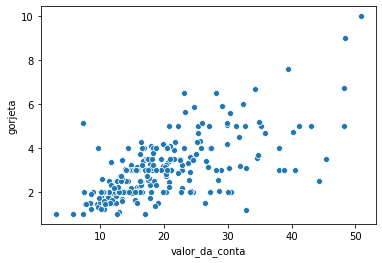

In [24]:
#gerando um gráfico de pontos - verificar a relação das variáveis valor da conta e gorjeta
sns.scatterplot(x = 'valor_da_conta',y = 'gorjeta', data = gorjetas)

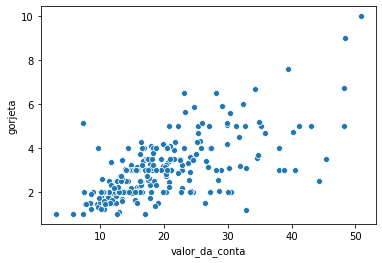

In [25]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta',y = 'gorjeta', data = gorjetas)

#### Pode-se perceber que gerou uma regressão com correlação linear positiva, o valor da gorjeta aumenta com o valor da conta.

In [26]:
gorjetas.shape[0]

244

In [27]:
#verificando e contando os registros não nulos
gorjetas.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia_da_semana     244
hora_do_dia       244
total_pessoas     244
dtype: int64

In [28]:
#verificando a porcentagem
#criando um campo a mais- porcentagem
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']) * 100

In [29]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765


In [30]:
#colocando apenas duas casas decimais
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [31]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
5,25.29,4.71,Não,Domingo,Jantar,4,18.62
6,8.77,2.00,Não,Domingo,Jantar,2,22.81
7,26.88,3.12,Não,Domingo,Jantar,4,11.61
8,15.04,1.96,Não,Domingo,Jantar,2,13.03
9,14.78,3.23,Não,Domingo,Jantar,2,21.85


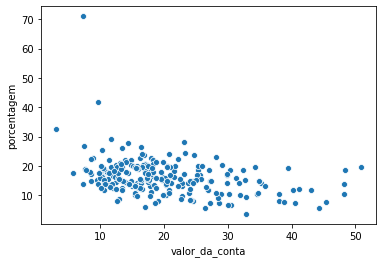

In [32]:
#verificar se os valores das contas são proporcionais aos valores das gorjetas
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

#### visualmete, o valor da conta não é proporcional ao valor da gorjeta.

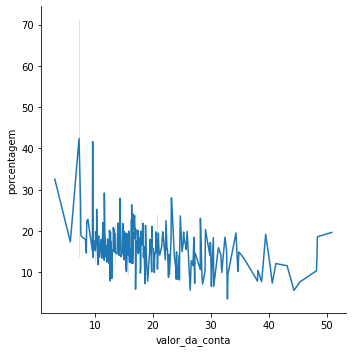

In [33]:
#gerando um outro tipo de gráfico - com parametro de linha
procentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

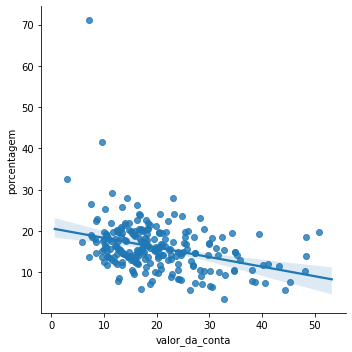

In [34]:
#utilizando o lmplot
sns.lmplot(x='valor_da_conta', y = 'porcentagem',data = gorjetas)

## Análise 2 - sobremesa

In [35]:
#Analisar todos que pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,7.89
58,11.24,1.76,Sim,Sábado,Jantar,2,15.66
60,20.29,3.21,Sim,Sábado,Jantar,2,15.82
61,13.81,2.00,Sim,Sábado,Jantar,2,14.48
62,11.02,1.98,Sim,Sábado,Jantar,2,17.97
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,19.32
236,12.60,1.00,Sim,Sábado,Jantar,2,7.94
237,32.83,1.17,Sim,Sábado,Jantar,2,3.56
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36


In [36]:
#Imprimir a analise descritiva dos dados de quem apenas pediu sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,16.32
std,9.83,1.40,0.81,8.51
min,3.07,1.00,1.00,3.56
25%,13.42,2.00,2.00,10.68
50%,17.92,3.00,2.00,15.38
75%,26.86,3.68,3.00,19.51
max,50.81,10.00,5.00,71.03


In [37]:
gorjetas.gorjeta.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: gorjeta, dtype: float64

In [38]:
#Imprimir a analise descritiva dos dados de quem NAO pediu sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,15.93
std,8.26,1.38,1.02,3.99
min,7.25,1.00,1.00,5.68
25%,13.32,2.00,2.00,13.69
50%,17.59,2.74,2.00,15.56
75%,22.76,3.50,3.00,18.50
max,48.33,9.00,6.00,29.20


## Gerando alguns gráficos

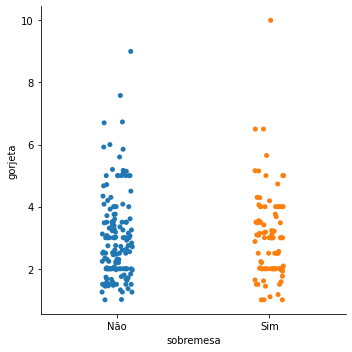

In [39]:
#criando um gráfico categórico
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

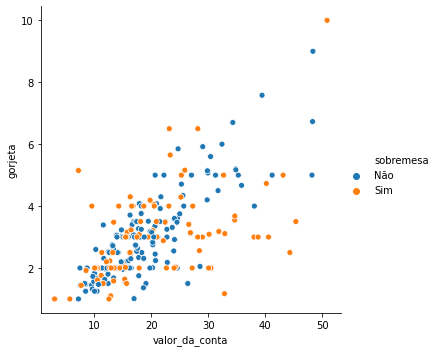

In [40]:
#Gerar um grafico para identificar 
sns.relplot(x='valor_da_conta', y='gorjeta', hue ='sobremesa', data = gorjetas)

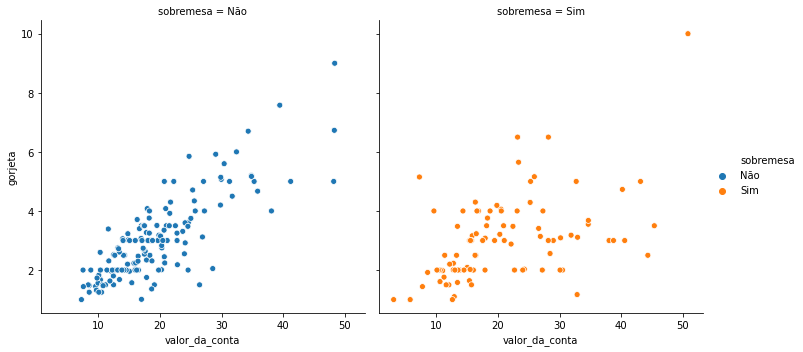

In [41]:
#separando os plots em um gráfico
sns.relplot(x='valor_da_conta', y='gorjeta', hue ='sobremesa', col="sobremesa", data = gorjetas)

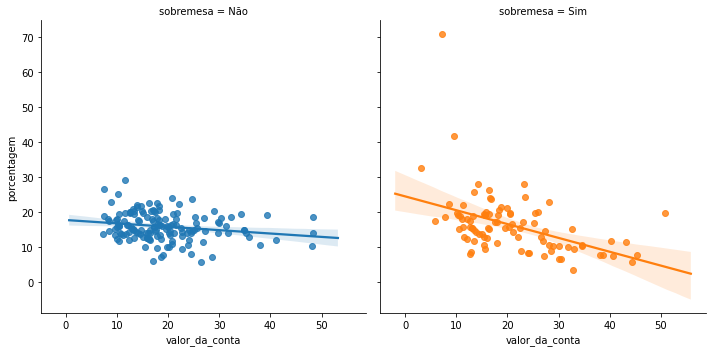

In [42]:
#separando os plots em um gráfico
sns.lmplot(x='valor_da_conta', y='porcentagem', hue ='sobremesa', col="sobremesa", data = gorjetas)

### visualmente existe diferença mo valor da gorjeta daqueles que pediram e quem nao pediu..

### Realizando teste de hipótese 
#### Hipótese Nula: A distribuição da taxa da gorjeta é igual nos dois grupos
#### Hipótese alternativa: A distribuição é diferente entre as duas amostras

In [43]:
#importando scipy e a biblioteca ranksums
from scipy.stats import ranksums


In [44]:
#trazer a porcentagem de todas as pessoas que pediram a sobremesa - montar uma query
gorjetas.query("sobremesa == 'Sim'").porcentagem

56      7.89
58     15.66
60     15.82
61     14.48
62     17.97
       ...  
234    19.32
236     7.94
237     3.56
240     7.36
241     8.82
Name: porcentagem, Length: 93, dtype: float64

In [45]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [46]:
#separando as porcentagens para fazer a análise
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
235    12.41
238    13.03
239    20.39
242     9.82
243    15.97
Name: porcentagem, Length: 151, dtype: float64

In [47]:
#realizando o Ranksums - teste de hipotese
r=ranksums(sobremesa,sem_sobremesa)
r

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

In [48]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.558850059321255


#### p>0,5 : então não existe diferença significativa, a distribuição é a mesma nos dois grupos

## Análises relacionadas aos dias da semana

In [49]:
#analisar e verificar quais os dias da semana que o pessoal dá mais gorjetas
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
5,25.29,4.71,Não,Domingo,Jantar,4,18.62
6,8.77,2.00,Não,Domingo,Jantar,2,22.81
7,26.88,3.12,Não,Domingo,Jantar,4,11.61
8,15.04,1.96,Não,Domingo,Jantar,2,13.03
9,14.78,3.23,Não,Domingo,Jantar,2,21.85


In [50]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

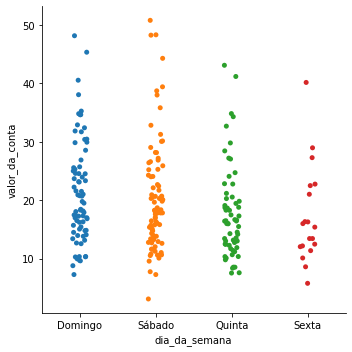

In [51]:
#plotando o gráfico para ver qual dia da semana as pessoas gastaram mais - GRAFICO CATEGÓRICO
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

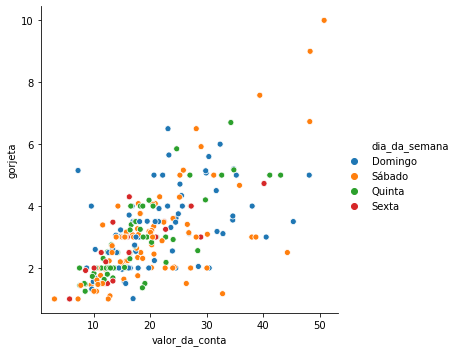

In [56]:
#plotando graficos juntos com tonalidade diferente(hue) para os dias da semana
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue='dia_da_semana',data=gorjetas)

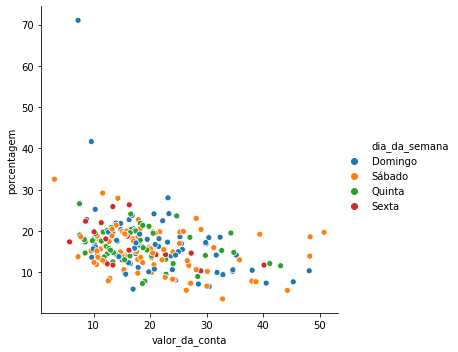

In [57]:
#plotando graficos juntos com tonalidade diferente(hue) para os dias da semana
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue='dia_da_semana',data=gorjetas)

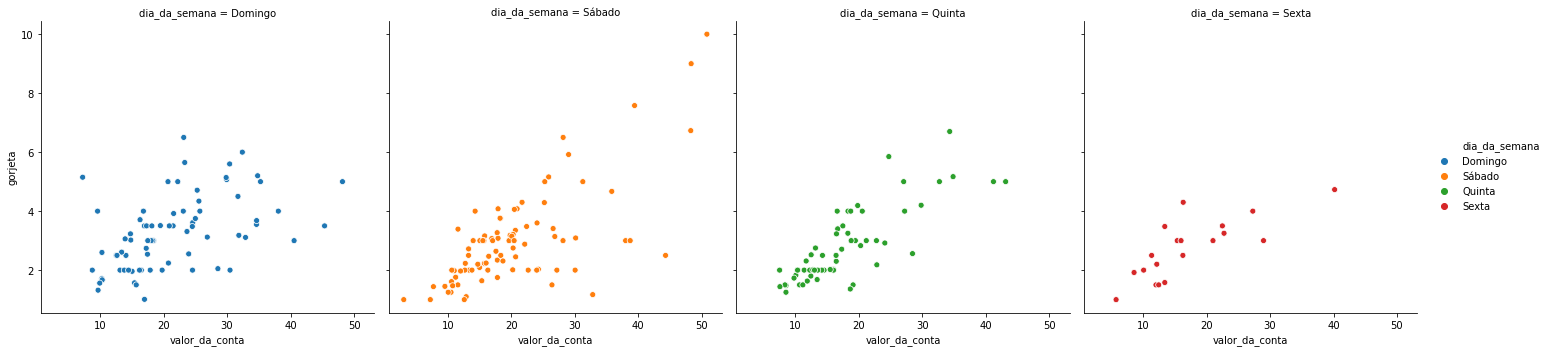

In [58]:
#separando os gráficos por dias da semana - propriedade col (cada dia da semana em u gráfico)
sns.relplot(x ='valor_da_conta', y = "gorjeta", hue='dia_da_semana',col = 'dia_da_semana',data = gorjetas )


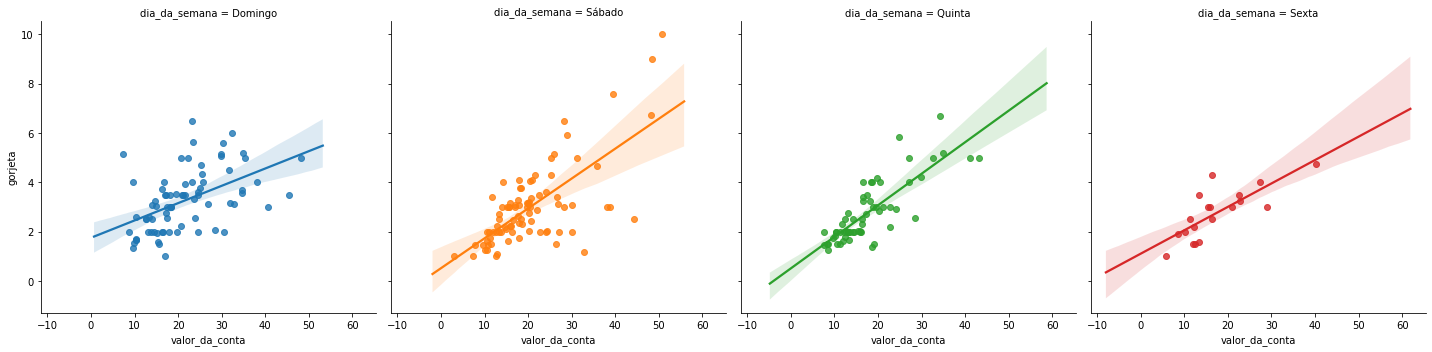

In [59]:
#separando os gráficos por dias da semana - propriedade col (cada dia da semana em u gráfico)
sns.lmplot(x ='valor_da_conta', y = "gorjeta", hue='dia_da_semana',col = 'dia_da_semana',data = gorjetas )

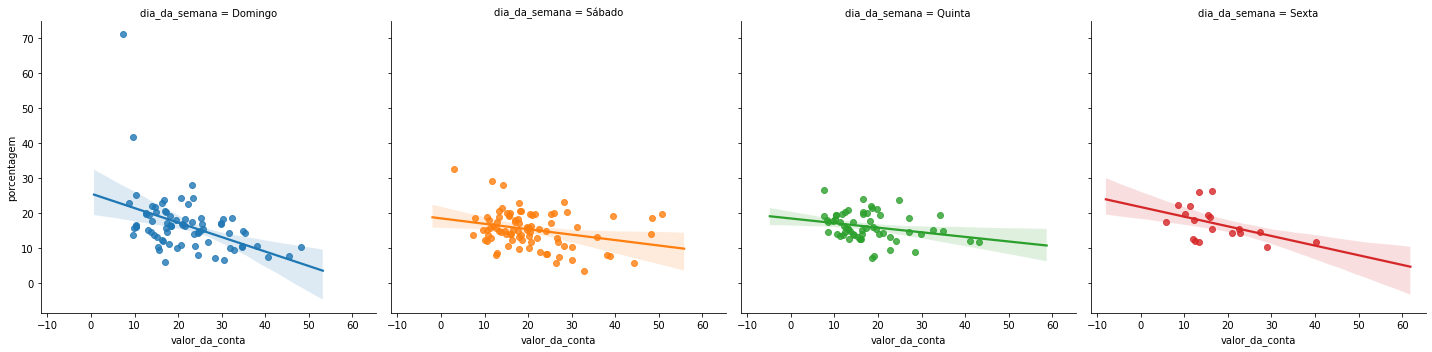

In [61]:
#separando os gráficos por dias da semana - propriedade col (cada dia da semana em u gráfico)
sns.lmplot(x ='valor_da_conta', y = "porcentagem", hue='dia_da_semana',col = 'dia_da_semana',data = gorjetas )

## Análises descritivas

In [70]:
#media geral do valor das contas
mediaconta = gorjetas.valor_da_conta.mean()
print('A media dos valores das contas é {}'.format(mediaconta))

A media dos valores das contas é 19.785942622950824


In [72]:
mediagorjeta = gorjetas.gorjeta.mean()
print('A media dos valores das gorjetas é {}'.format(mediagorjeta))

A media dos valores das gorjetas é 2.9982786885245902


In [73]:
#media geral de cada dia
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,16.689605
Quinta,17.682742,2.771452,2.451613,16.126452
Sexta,17.151579,2.734737,2.105263,16.991579
Sábado,20.441379,2.993103,2.517241,15.314598


In [74]:
#media geral de cada dia - retirando as pessoas
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [76]:
#VERIFICAR A FREQUECIA DOS DIAS
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()


Frequencia dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## TESTAR A HIPOTESE

#### HIPOTESE NULA: distribuição do valor é igual no sábado e domingo
#### HIPOTESE ALTERNATIVA: a distribuição é diferente p<0,05

In [85]:
conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
conta_domingo




0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [86]:
conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [89]:
#comparando os dois grupos
x=ranksums(conta_domingo,conta_sabado)
x
print('A frequencia de sabado e domingo não são diferentes!! HIPOTESE NULA ACEITA')

A frequencia de sabado e domingo não são diferentes!! HIPOTESE NULA ACEITA


In [91]:
#Analisando a hipotese dos valores das contas para os dias da semana
conta_quinta = gorjetas.query("dia_da_semana == 'Quinta'").valor_da_conta

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
202    13.00
203    16.40
204    20.53
205    16.47
243    18.78
Name: valor_da_conta, Length: 62, dtype: float64

In [92]:
conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [94]:
#Testando a hipotese
z=ranksums(conta_quinta,conta_sabado)
z

RanksumsResult(statistic=-1.9891147978189907, pvalue=0.046688533353323416)

### Analisar se ocorre diferença entre os períodos do dia


In [95]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


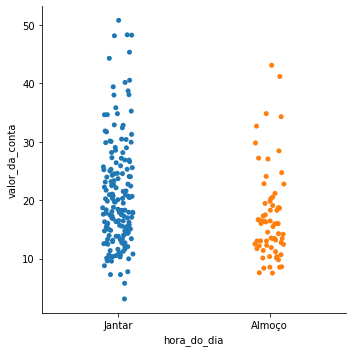

In [98]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta',data = gorjetas)

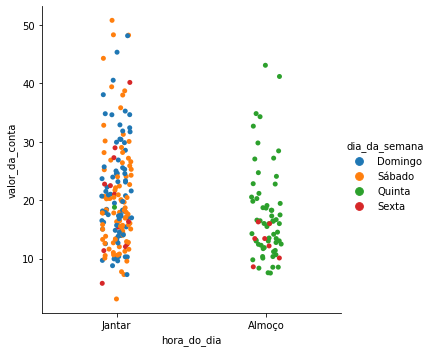

In [97]:
#plotar um grafico categórico
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', hue = 'dia_da_semana',data = gorjetas)

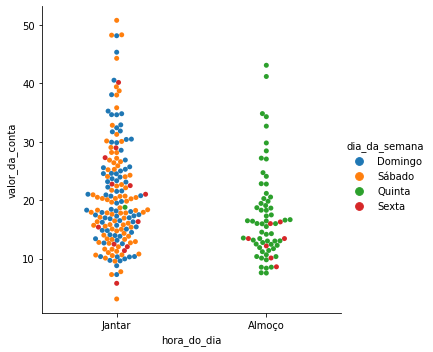

In [99]:
#parametro para enchergar melhor os pontos - kind
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', hue = 'dia_da_semana',data = gorjetas)

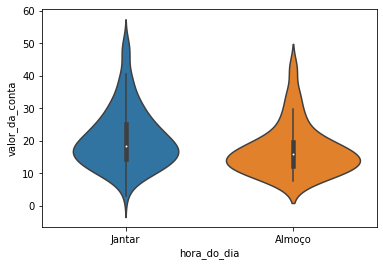

In [107]:
#GRAFICO VIOLIN PLOT
sns.violinplot(x = 'hora_do_dia', y ='valor_da_conta', data = gorjetas)

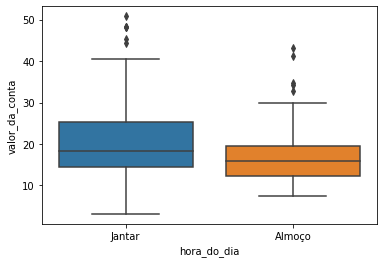

In [108]:
#GRAFICO BOXPLOT
sns.boxplot(x = 'hora_do_dia', y ='valor_da_conta', data = gorjetas)

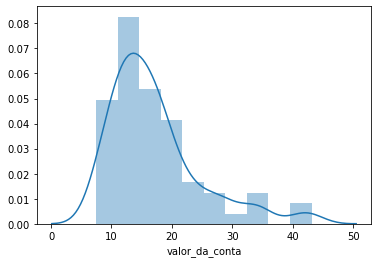

In [112]:
#GRAFICO DISPLOT-HISTOGRAMA
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(almoço)

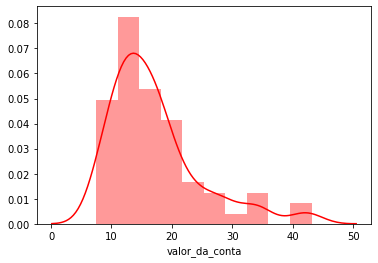

In [113]:
#GRAFICO DISPLOT-HISTOGRAMA
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(almoço, color = 'red')

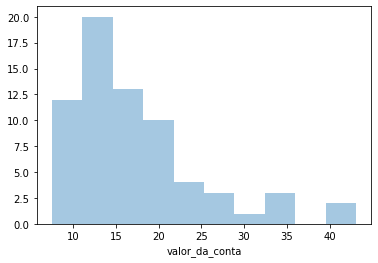

In [114]:
#GRAFICO DISPLOT-HISTOGRAMA - FREQUENCIA
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(almoço, kde=False)

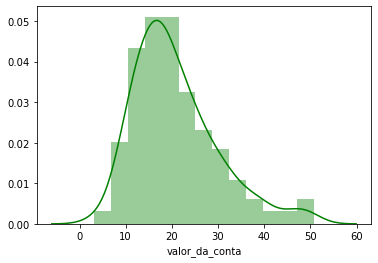

In [115]:
#GRAFICO DISPLOT-HISTOGRAMA - jantar - FREQUENCIA
jantar= gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.distplot(jantar, color = 'green')

## ANALISES EM RELAÇÃO AS HORAS DOS DIAS
#### Se gastam mais no almoço ou na janta


In [117]:
#separando as medias do almoço e janta
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


### teste de hipotese

In [133]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
almoco


77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

In [134]:
janta = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
janta


0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

In [138]:
from scipy.stats import ranksums

In [139]:
zz = ranksums(janta,almoco)
zz
#aceita a hipotese alternativa

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [140]:
porcj= gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcj

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
239    20.39
240     7.36
241     8.82
242     9.82
243    15.97
Name: porcentagem, Length: 176, dtype: float64

In [141]:
porcal= gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcal

77     14.71
78     13.18
79     15.67
80     15.43
81     20.41
       ...  
222    22.38
223    18.77
224    11.77
225    15.37
226    19.82
Name: porcentagem, Length: 68, dtype: float64

In [142]:
# testando a hipotese entre as porcentagens
x1 = ranksums(porcj,porcal)
x1

RanksumsResult(statistic=-1.204699018193021, pvalue=0.22831951519679017)